# Effect size

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import importlib
from tqdm import tqdm
import pickle

from os.path import dirname, join
from pprint import pprint

import pydicom
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir

from sklearn.linear_model import LinearRegression
from tqdm import tqdm

import aux_preprocessing as aux

In [2]:
# Load data
with open('data/YX_12_NO_IMG.pickle','rb') as f:  # Python 3: open(..., 'rb')
    Y12, __ = pickle.load(f)
with open('data/YX_22_NO_IMG.pickle','rb') as f:  # Python 3: open(..., 'rb')
    Y22, __ = pickle.load(f)
with open('data/X_sizes.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
    X = pickle.load(f)
with open('data/X_sizes_labels.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
    labels = pickle.load(f)
Y = np.append(Y12,Y22,axis=0)


In [3]:
print('labels of X are', labels)
np.shape(X[:,0])

labels of X are ['size', 'size_hollow', 'perimeter', 'meanhu']


(7787,)

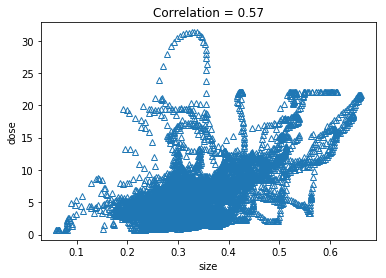

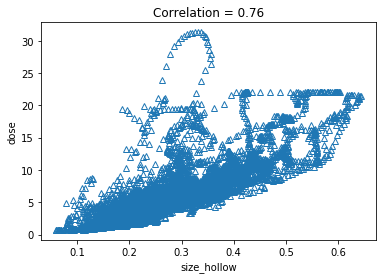

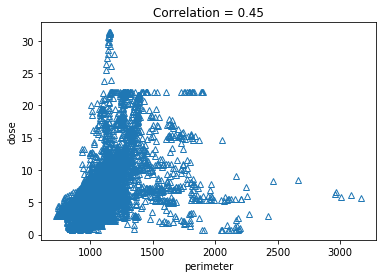

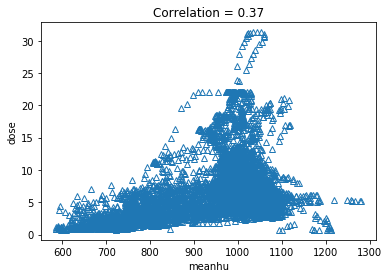

In [4]:

size = X[:,0].reshape(-1, 1)

reg = LinearRegression().fit(size, Y)
pred_dose = reg.predict(size)
# reg2 = LinearRegression().fit(size_h, dose)
# plt.plot(size,pred_dose)

i = 0
for feat in labels:
    corr = np.corrcoef( X[:,i],Y[:,0])[0][1]
    plt.plot(X[:,i],Y,  '^', mfc='none')
    plt.xlabel(labels[i])
    plt.ylabel('dose')
    plt.title('Correlation = {:.2f}'.format(corr))
    plt.show()
    i += 1

0.32785263176298396


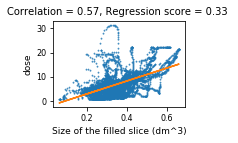

The regression line is dose = 26.64 * volume + -2.34
0.5801400304136475


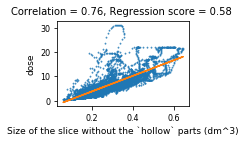

The regression line is dose = 32.19 * volume + -2.62


In [41]:

x = X[:,0].reshape(-1, 1)
reg = LinearRegression().fit(x, Y)
pred_dose = reg.predict(x)
# reg2 = LinearRegression().fit(size_h, dose)
# plt.plot(size,pred_dose)

corr = np.corrcoef( X[:,0],Y[:,0])[0][1]
print(reg.score(x, Y))

x_cm = 6
y_cm = 4

fig = plt.figure(figsize=(x_cm/2.54,y_cm/2.54))

plt.plot(X[:,0],Y,  '^', mfc='none', markersize = 1)
plt.plot(x,pred_dose)

plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.xlabel('Size of the filled slice (dm^3)',fontdict={"family": "sans-serif", "color": "black", "weight": "normal", "size": "9"})
plt.ylabel('dose',fontdict={"family": "sans-serif", "color": "black", "weight": "normal", "size": "9"})
plt.title('Correlation = {:.2f}, Regression score = {:.2f} '.format(corr, reg.score(x, Y)),fontdict={"family": "sans-serif", "color": "black", "weight": "normal", "size": "10"})


plt.savefig('Images/size_filled_vs_dose.png',dpi=300,bbox_inches='tight')
plt.show()
i += 1
print('The regression line is dose = {:.2f} * volume + {:.2f}'.format(reg.coef_[0][0],reg.intercept_[0]))

x = X[:,1].reshape(-1, 1)
reg = LinearRegression().fit(x, Y)
pred_dose = reg.predict(x)
# reg2 = LinearRegression().fit(size_h, dose)
# plt.plot(size,pred_dose)

corr = np.corrcoef( X[:,1],Y[:,0])[0][1]
print(reg.score(x, Y))

fig = plt.figure(figsize=(x_cm/2.54,y_cm/2.54))

plt.plot(X[:,1],Y,  '^', mfc='none', markersize = 1)
plt.plot(x,pred_dose)

plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.xlabel('Size of the slice without the `hollow` parts (dm^3)',fontdict={"family": "sans-serif", "color": "black", "weight": "normal", "size": "9"})
plt.ylabel('dose',fontdict={"family": "sans-serif", "color": "black", "weight": "normal", "size": "9"})
plt.title('Correlation = {:.2f}, Regression score = {:.2f} '.format(corr, reg.score(x, Y)),fontdict={"family": "sans-serif", "color": "black", "weight": "normal", "size": "10"})

plt.savefig('Images/size_hollow_vs_dose.png',dpi=300,bbox_inches='tight')
plt.show()
i += 1
print('The regression line is dose = {:.2f} * volume + {:.2f}'.format(reg.coef_[0][0],reg.intercept_[0]))


The regression line is dose = 26.64 * volume -2.34

In [9]:
reg.score(x, Y)

0.5801400304136475